In [89]:
#Library import
import cv2
import numpy as np
import pytesseract 
from PIL import Image
import matplotlib.pyplot as plt

In [91]:
#Function of picture show(draw the picture use cv2)
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)  
    cv2.destroyAllWindows()

In [93]:
#plt show fuction(draw the picture use matplotlib)
def plt_show(name,img):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(name) 
    plt.axis('off')

In [95]:
#Gray method use Max_Gray
def Max_Gray(srcImg_path):
    img = srcImg_path
    # Obtain image size
    h,w = img.shape[0:2] 
    # Custom blank single channel image for storing grayscale images
    gray = np.zeros((h,w),dtype=img.dtype)
    # Traverse the original image and then grayscale it separately
    for i in range(h):
        for j in range(w):
            # Find the maximum value among the three channels
            gray[i,j] = max(img[i,j,0],img[i,j,1],img[i,j,2]) 
    gray = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
    plt.imshow(gray)
    plt.title('Max_Gray')
    #plt.axis('on')
    plt.show()
    return gray
#not good!!!

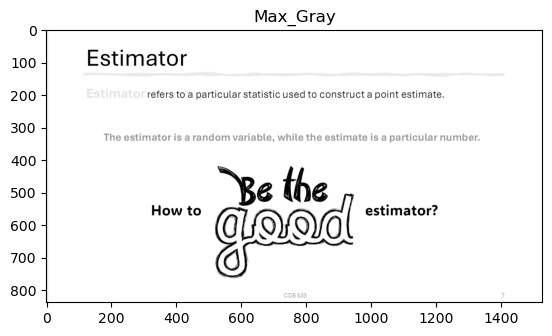

In [97]:
#picture import
#img = cv2.imread('assi3.png',cv2.IMREAD_GRAYSCALE)
img = cv2.imread('assi1.png')
img = Max_Gray(img)

In [99]:
#Show the img
cv_show('img',img)

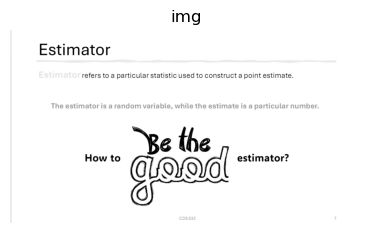

In [101]:
#plt the img
plt_show('img',img)

In [103]:
#Not so clear so try
# Use gamma
gamma = 0.5
 
gamma_correction = np.power(img / 255.0, gamma)
gamma_correction = (gamma_correction * 255).astype(np.uint8)

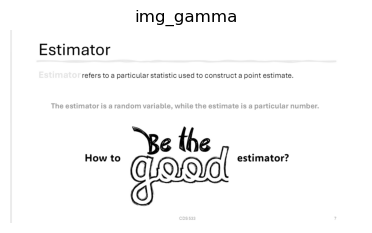

In [107]:
cv_show('img_gamma',img)
plt_show('img_gamma',img)
#not a good idea

In [121]:
# Apply median filtering
#filtered_image = cv2.medianBlur(img, 5)  # The second parameter is the kernel size and must be odd
#Gaussian filtering denoising
filtered_image = cv2.GaussianBlur(img, (5, 5), 0)

In [123]:
#show picture after (Gaussian)median filtering
cv_show('filtered_image',filtered_image)

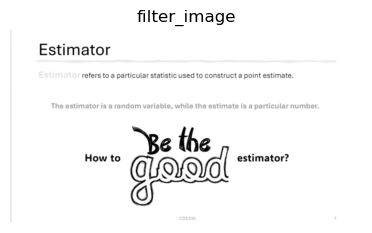

In [125]:
# Display the original image
plt_show('filter_image',filtered_image)

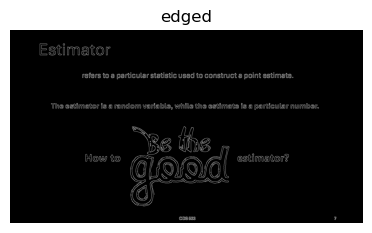

In [127]:
# edge detection 
edged = cv2.Canny(filtered_image, 75, 200)
cv_show('edged',edged)
plt_show('edged',edged)

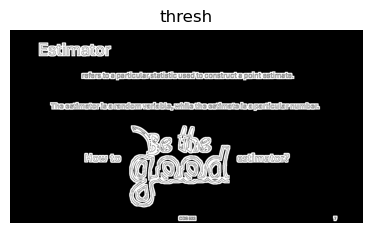

In [129]:
#Apply adaptive threshold processing
thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2) 
cv_show('thresh',thresh)
plt_show('thresh',thresh)

In [131]:
#Contour detection
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Traverse the contour and draw a bounding box  
for contour in contours:   
    if cv2.contourArea(contour) < 500:  
        continue  
  
    # Get bounding box 
    x, y, w, h = cv2.boundingRect(contour)  
      
    # Draw a bounding box 
    cv2.rectangle(filtered_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [133]:
#data finding 
#Download!
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 6'  
text = pytesseract.image_to_string(thresh, config=custom_config, lang='eng') 
print("Detected Text:")  
print(text)
#actually not good

Detected Text:
Te een eno
ESuIMmMeator
whe estimator is alrandom variable; while the estimate paricular, number.
Ke Hine -
WD WE ff ;
Tele Bae fe WI
WII AINA
WRAY
SS



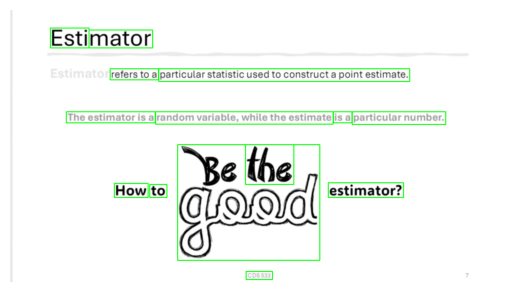

In [135]:
#not such good
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()